In [1]:
import yaml
import netCDF4 as nc
import numpy as np
from utils.read_data import *
from utils.param_alpha import get_alpha, get_complex_alpha, compute_alpha_whole_trajectory,compute_alpha_matrix, get_alpha_averaged, update_alpha_GD
from models.linear_model import u_drift_linear, u_drift_linear_complex, u_drift_linear_matrix
from utils.RK4 import RK4_step, compute_position
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


In [48]:
with open('configs_2/trace_ISMER_20151013_spot057_drift.yml', 'r') as f:
    config = yaml.safe_load(f)

true_lon, true_lat, true_time = get_true_drift_positions(config['PATH_DRIFT'])

ds = nc.Dataset(config['PATH_WATER'])

lat, lon = ds.variables['lat'], ds.variables['lon']
water_u = ds.variables['water_u']
water_v = ds.variables['water_v']

x, y = np.meshgrid(list(lon),list(lat)) 

In [49]:
time = ds.variables['time']
time[:].data

print(time[0], time[-1], '(must be wider)')
print(true_time[0], true_time[-1])

if time[0]<true_time[0] and time[-1]>true_time[-1]:
    print('Times OK')
else:
    print('TIMES NOT OK!')

138336.0 139104.0 (must be wider)
138805.1 139094.88333333333
Times OK


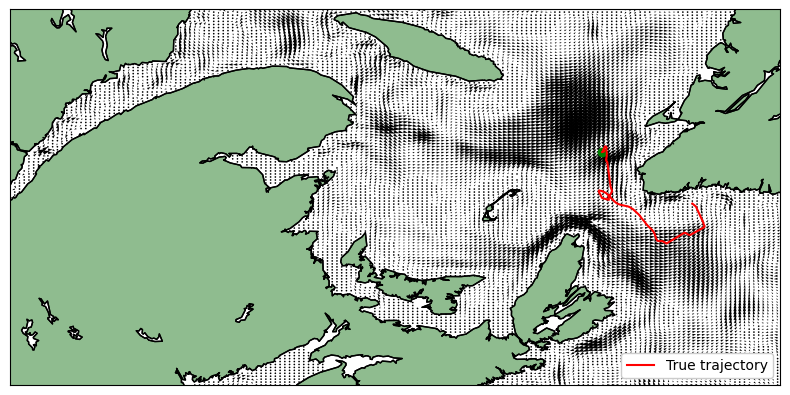

In [50]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# setting the size of the map
fig,ax = plt.subplots(figsize=(8,5))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = config['min_lat'], urcrnrlat = config['max_lat'], llcrnrlon = config['min_lon'], urcrnrlon = config['max_lon'], resolution = 'i') 

# drawing the coastline
m.drawcoastlines()
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')

x_,y_ = m(x,y)

Q = ax.quiver(x_, y_, water_u[3,0,:,:], water_v[3,0,:,:]) #, scale=5, width = 0.005) 
m.plot(true_lon,true_lat,latlon=True,linewidth=1.5,color='r', label='True trajectory')
m.scatter(true_lon[0], true_lat[0],latlon=True,c='g',marker='o')
plt.legend(loc = 'lower right',framealpha=1)
plt.tight_layout()
plt.show()


In [46]:
len(true_lon)

807

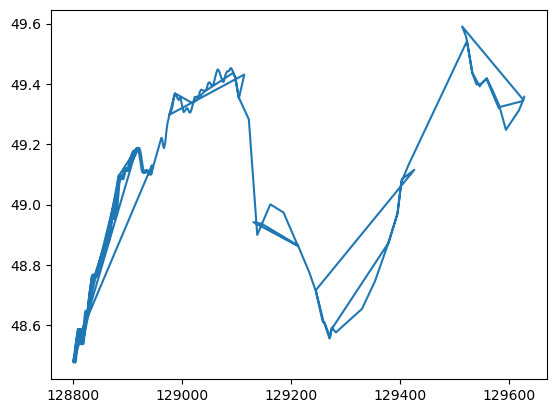

In [47]:
plt.plot(true_time,true_lat)